Linear Registration Example
===========================

Author: manoj


In [1]:
%pylab inline


Welcome to pylab, a matplotlib-based Python environment [backend: module://IPython.zmq.pylab.backend_inline].
For more information, type 'help(pylab)'.


In [2]:
from imreg import register, sampler, model, metric

In [3]:
from scipy.misc import lena
from scipy import ndimage

In [4]:
image = ndimage.zoom(lena(), 0.1)
template = ndimage.rotate(image, 30, reshape=False)

In [5]:
registrator = register.Register()

In [6]:
image = register.RegisterData(image)

template = register.RegisterData(template)

tform = model.Homography()

In [7]:
step, search = registrator.register(image, template, tform, sampler=sampler.bilinear)

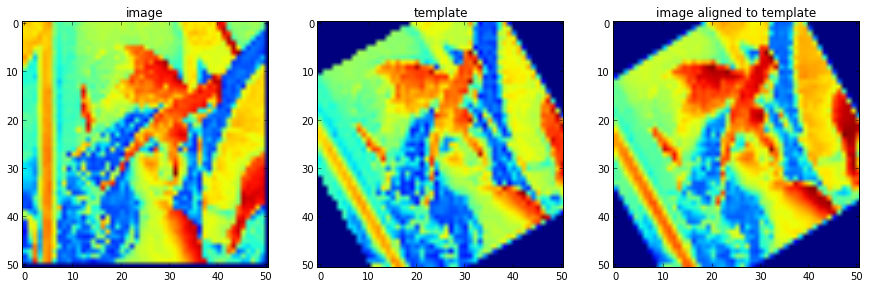

In [9]:
fix, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))

warpedImage = sampler.bilinear(image.data, tform(step.p, template.coords).tensor)

ax1.imshow(image.data)
_ = ax1.set_title('image')

ax2.imshow(template.data)
_ = ax2.set_title('template')

ax3.imshow(warpedImage)
_ = ax3.set_title('image aligned to template')